In [4]:
import numpy as np
from icl.util_classes.arg_classes import AttrArgs
import matplotlib.pyplot as plt

def plot_ndarray(data, args):
    names = [r'$S_{wp}$', r'$S_{pq}$', r'$S_{ww}$']
    type_num = len(data)
    
    
    fig, ax = plt.subplots()
    
    for i in range(type_num):
        ax.plot(data[i], label=names[i]) 
        
    ax.legend()
    ax.set_ylabel('S')
    ax.set_xlabel('Layer')
    
    fig.savefig(f'attn_attr_{args.task_name}_{args.demonstration_shot}.pdf')
    plt.show()


In [8]:
task = 'sst2'
demonstration_shot = 1
proportions_list = []
for seed in [42]:
    ana_args = AttrArgs(task_name=task,sample_size=1000,seeds=[seed],demonstration_shot=demonstration_shot)
    results = ana_args.load_result()
    proportions = results.mean(axis=0)
    proportions = proportions / proportions.sum(axis=0,keepdims=True)
    proportions_list.append(proportions[np.newaxis,...])
proportions = np.concatenate(proportions_list,axis=0)
proportions = proportions.mean(0)

import pickle
with open(f'attn_attr_{task}_{demonstration_shot}.pkl', 'wb') as f:
    pickle.dump(proportions, f)

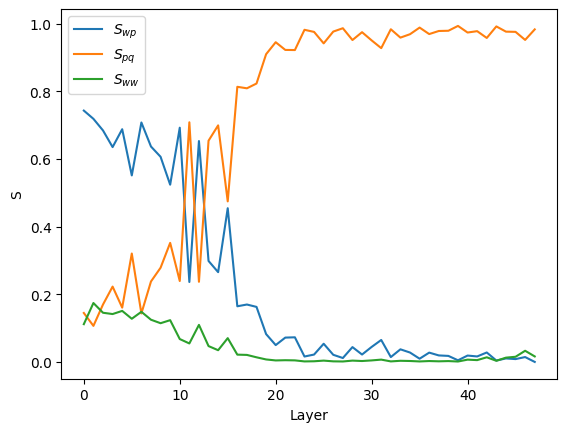

In [9]:
plot_ndarray(proportions,ana_args)